In [1]:
using LinearAlgebra, FFTW, Plots#lyJS##

In [32]:
# Define data
x = range(-2,2,length=401) #  spatial coordinate !!
Nx = size(x,1)

amp1 = 1
x01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
x02 = -0.5
sigmay2 = 0.3

dt = 0.01
Nt = 1001
tend = dt*(Nt-1)
t = range(0,tend,length=Nt) # time

omega1 = 1.3
omega2 = 4.1

y1 = amp1*exp.(-((x.-x01).^2)/(2*sigmay1^2))
y2 = amp2*exp.(-((x.-x02).^2)/(2*sigmay2^2));

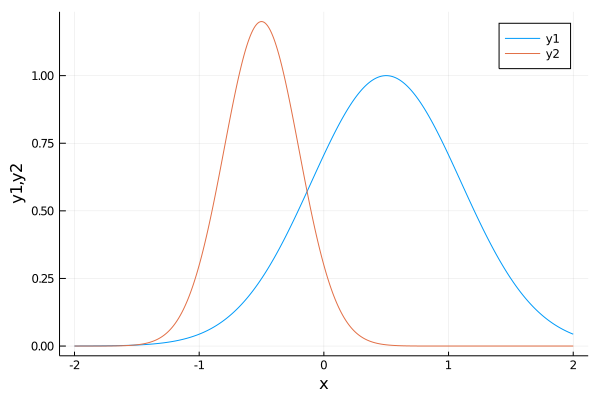

In [33]:
plot(x,y1)
plot!(x,y2,xlabel="x",ylabel="y1,y2")

In [34]:
Y = zeros(Nx,Nt)
j=1
for tt in t
    Y[:,j] = y1*sin(2*pi*omega1*tt) + y2*sin(2*pi*omega2*tt)
    j+=1
end

In [4]:
Y

401×1001 Array{Float64,2}:
 0.0  1.4998e-5   2.98285e-5  4.43293e-5   …  -1.4998e-5   5.25833e-19
 0.0  1.61985e-5  3.22091e-5  4.78506e-5      -1.61985e-5  5.48291e-19
 0.0  1.75013e-5  3.47918e-5  5.16682e-5      -1.75013e-5  5.69605e-19
 0.0  1.89165e-5  3.75959e-5  5.58102e-5      -1.89165e-5  5.89265e-19
 0.0  2.0455e-5   4.06432e-5  6.03079e-5      -2.0455e-5   6.06663e-19
 0.0  2.21293e-5  4.39577e-5  6.51963e-5   …  -2.21293e-5  6.2108e-19
 0.0  2.39531e-5  4.75663e-5  7.05141e-5      -2.39531e-5  6.31667e-19
 0.0  2.59416e-5  5.1499e-5   7.63044e-5      -2.59416e-5  6.3743e-19
 0.0  2.8112e-5   5.5789e-5   8.26154e-5      -2.8112e-5   6.37202e-19
 0.0  3.04833e-5  6.04737e-5  8.95007e-5      -3.04833e-5  6.29625e-19
 0.0  3.30768e-5  6.55945e-5  9.702e-5     …  -3.30768e-5  6.1312e-19
 0.0  3.59163e-5  7.11979e-5  0.00010524      -3.59163e-5  5.85858e-19
 0.0  3.90284e-5  7.73356e-5  0.000114235     -3.90284e-5  5.45724e-19
 ⋮                                         ⋱         

In [5]:
maximum(abs.(Y))

1.469344038192705

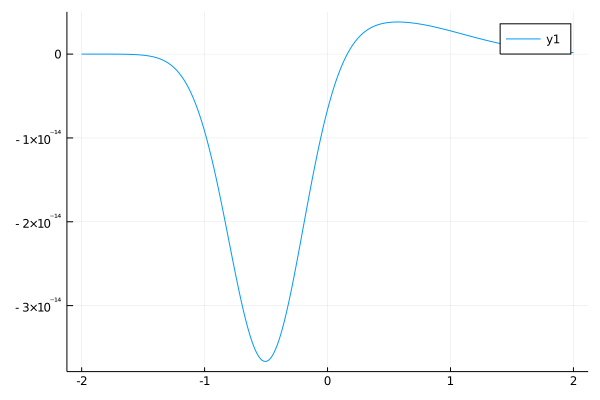

In [26]:
plot(x,Y[:,1001])

In [31]:
t

10

Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.
Arrays have incorrect length or dimension.

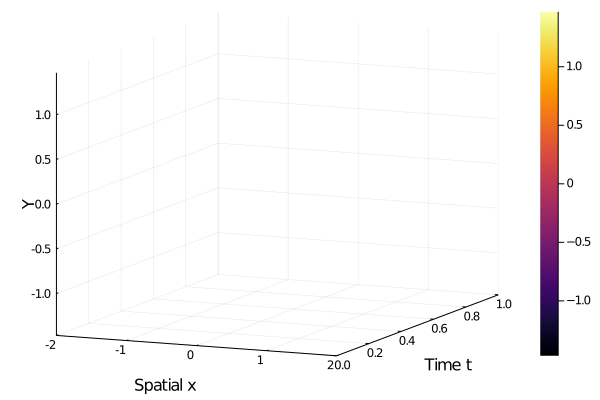


Arrays have incorrect length or dimension.


In [29]:
#my_cg = cgrad([:blue, :yellow])
plot(x,t,Y,st = :surface, xaxis="Spatial x", yaxis="Time t",zaxis="Y")
#plot(x,t,abs.(Y),st = :contour, xaxis="spatial x", yaxis="time t",ylim=(0,2),levels=15)

In [ ]:
#= trace=PlotlyJS.surface(x=x,y=t,z=Y, colorscale="Viridis")

layout=Layout(title="interactive plot")
PlotlyJS.plot(trace,layout) =#

In [9]:
Z=svd(Y)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
401×401 Array{Float64,2}:
 -1.34773e-5  -1.05037e-5   1.57952e-5   …  -9.43379e-9    0.000117477
 -1.44668e-5  -1.12037e-5  -2.70376e-5      -0.00550171    0.000109597
 -1.55268e-5  -1.19414e-5  -5.37216e-5       0.17714       0.000113776
 -1.66623e-5  -1.27178e-5  -3.27023e-5      -0.155971      0.000120797
 -1.78787e-5  -1.35332e-5  -2.7249e-5        0.263083      0.000135914
 -1.9182e-5   -1.43883e-5   0.000103344  …   0.0689963     0.000137006
 -2.05783e-5  -1.5283e-5   -5.92221e-6       0.388301      0.000152929
 -2.20745e-5  -1.62171e-5   5.96787e-5       0.548028      0.000153814
 -2.36779e-5  -1.71898e-5   8.09899e-5      -0.476397      0.000187376
 -2.53964e-5  -1.82001e-5   5.19588e-5       0.162632      0.000184416
 -2.72386e-5  -1.92461e-5   5.74142e-5   …  -0.166256      0.000214549
 -2.92138e-5  -2.03255e-5   2.62295e-5      -0.219026      0.000209203
 -3.1332e-5   -2.14349e-5  -4.65029e-5       0.117109      0.000224091
  ⋮

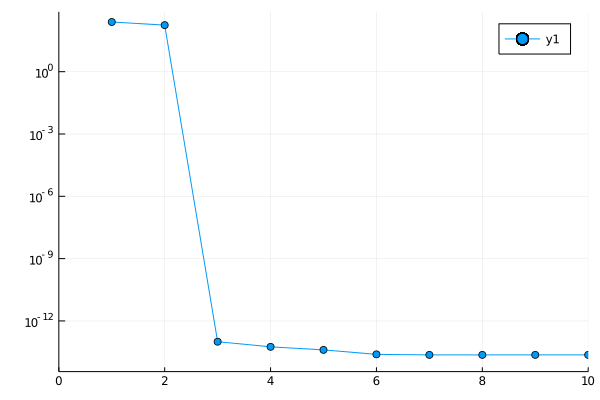

In [10]:
plot(Z.S, yaxis=:log, xlim=(0,10),shape =:circle)

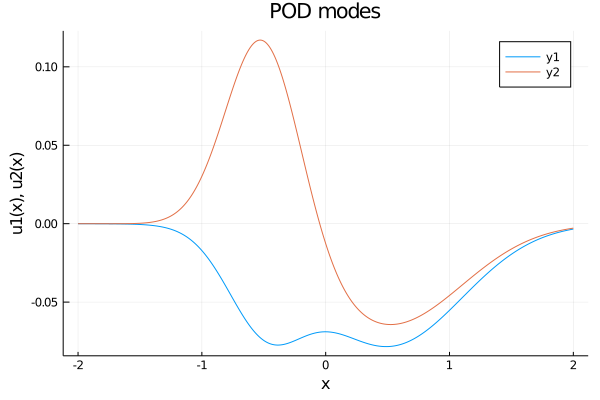

In [11]:
plot(x,Z.U[:,1])
plot!(x,Z.U[:,2])
xlabel!("x")
ylabel!("u1(x), u2(x)")
title!("POD modes")

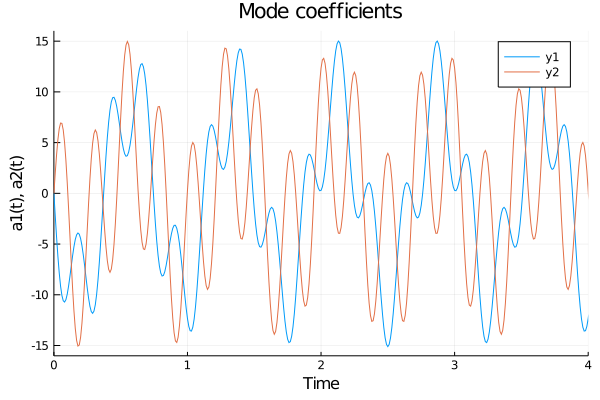

In [12]:
plot(t,Z.S[1]*Z.Vt[1,:],xlim=(0, 4))
plot!(t,Z.S[1]*Z.Vt[2,:],xlim=(0, 4))
xlabel!("Time")
ylabel!("a1(t), a2(t)")
title!("Mode coefficients")

In [13]:
# Run spectral POD (which here is just a Fourier Transform, as the data is deterministic)
# Note that this requires sufficient resolution in time, and enough snapshots
Yft=Array{Complex{Float64},2}(undef,Nx,Nt)


401×1001 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                           ⋮
 0.

In [14]:
#Y = zeros(Nx,Nt)
for j in 1:1:Nx
    Yft[j,:] = fft(Y[j,:])
end

In [15]:
Yft

401×1001 Array{Complex{Float64},2}:
  -1.2387e-17+0.0im  4.15265e-8-1.32315e-5im  …  4.15265e-8+1.32315e-5im
  -1.0571e-17+0.0im  4.45436e-8-1.41928e-5im     4.45436e-8+1.41928e-5im
 -1.32544e-17+0.0im  4.77704e-8-1.52209e-5im     4.77704e-8+1.52209e-5im
 -1.47587e-17+0.0im  5.12208e-8-1.63203e-5im     5.12208e-8+1.63203e-5im
  -1.2631e-17+0.0im  5.49099e-8-1.74958e-5im     5.49099e-8+1.74958e-5im
 -1.35254e-17+0.0im   5.8854e-8-1.87525e-5im  …   5.8854e-8+1.87525e-5im
 -1.55312e-17+0.0im  6.30703e-8-2.00959e-5im     6.30703e-8+2.00959e-5im
 -1.30104e-17+0.0im  6.75772e-8-2.15319e-5im     6.75772e-8+2.15319e-5im
 -1.56396e-17+0.0im  7.23944e-8-2.30668e-5im     7.23944e-8+2.30668e-5im
 -1.61004e-17+0.0im  7.75431e-8-2.47073e-5im     7.75431e-8+2.47073e-5im
 -2.05185e-17+0.0im   8.3046e-8-2.64607e-5im  …   8.3046e-8+2.64607e-5im
 -2.28767e-17+0.0im  8.89273e-8-2.83346e-5im     8.89273e-8+2.83346e-5im
 -2.76472e-17+0.0im   9.5213e-8-3.03374e-5im      9.5213e-8+3.03374e-5im
             ⋮ 

In [ ]:
freq = fftfreq(Nt,d=dt)

In [ ]:
plt.contour(x,freq,np.transpose(np.abs(Yft)))
plt.xlabel('x', fontsize=18)
plt.ylabel('frequency (rad/s)', fontsize=18)
plt.title('Spectral content', fontsize=18)
plt.ylim(0,6);

In [ ]:
# Identify indices corresponding to input frequencies
# (we could also find these from the peaks in the above plot if we didn't know these)
ind1 = (np.abs(omega1 - freq)).argmin() 
ind2 = (np.abs(omega2 - freq)).argmin() 
print(freq[ind1])
print(freq[ind2])
plt.plot(x,np.abs(Yft[:,ind1]))
plt.plot(x,np.abs(Yft[:,ind2]))
plt.xlabel('y', fontsize=18)
plt.title('Spectral POD modes');

In [ ]:
# Try DMD instead (Note this doesn't work without time delays or complex data)
A = Y[:,1:Nt-1]@linalg.pinv(Y[:,2:Nt])
#A = np.dot((ModeCoeffs[1:np.shape(ModeCoeffs)[1],0:r]).T,(la.pinv(ModeCoeffs[0:(np.shape(ModeCoeffs)[1]-1),0:r])).T)

Lambda, W = np.linalg.eig(A)
LambdaCts = np.log(Lambda[:2])/(dt)

plt.plot(x,np.real(W[:,0]))
plt.plot(x,np.real(W[:,1]))
plt.xlabel('x', fontsize=18)
print(LambdaCts) # incorrect, since we need four independent components to define two frequencies